In [2]:
%matplotlib widget

from matplotlib import pyplot as plt
import os
from themachinethatgoesping.echosounders.simrad import FileRaw,FileRaw_mapped,SimradDatagram_type_from_string,datagram_type_to_string,t_SimradDatagramType
import themachinethatgoesping.echosounders.simrad as simrad
import themachinethatgoesping.echosounders.simrad.datagrams as dg
import themachinethatgoesping.tools.progressbars as prg
import themachinethatgoesping.tools as tools
import themachinethatgoesping.navigation.nmea_0183 as NMEA
import numpy
import os, sys
from time import time
from tqdm.auto import tqdm
from collections import defaultdict
import numpy as np

#load files
folders =  ["/home/data/"]
#folders =  ["/home/data/turbeams/"]
folders = ["/home/data/no_backup/ek80_test/"]

files = []
for folder in folders:
    for r,d,f in os.walk(folder):
        for file in f:
            if file.endswith('.raw'):
                files.append(r + '/' +file)
            
files.sort()
#files
file_name = files[0]

In [3]:

#fm = FileRaw_mapped(files[0:20])
fm = FileRaw_mapped(files)

indexing files ⠐ 100% :00s<00m:00s] [Found: 12382 packages in 26 files (2617MB)]                                            


In [4]:
#%%timeit -n1 -r1
if False:
    conv_factor = 10. * np.log10(2.0) / 256.

    data=[]
    for raw3 in tqdm(fm("RAW3",0,-1,1)):
        if raw3.data_type == raw3.data_type.ComplexFloat32:
            a = raw3.sample_data.complex_samples
            b = np.sum(a,axis=1)
            b = np.sum(b*b,axis=1)
            data.append(b)
        elif raw3.data_type == raw3.data_type.PowerAndAngle:
            a = raw3.sample_data.power[0].astype(np.float32) * conv_factor
            data.append(a)

In [10]:
#%%timeit -n1 -r1

steps=1
min_=0
max_=-1

data=[]
angle1=[]
angle2=[]
#for raw3 in tqdm(fm("RAW3",0,-1,steps)):
for raw3 in tqdm(fm("RAW3",min_*steps,max_*steps,1)):
    if raw3.data_type == raw3.data_type.ComplexFloat32:
        data.append(10*np.log10(raw3.sample_data.get_power()))
        pass
    elif raw3.data_type == raw3.data_type.PowerAndAngle:
        data.append(raw3.sample_data.get_power())
        angle = raw3.sample_data.get_angle()
        angle1.append(angle[:,0])
        angle2.append(angle[:,1])
        
        pass

  0%|          | 0/2286 [00:00<?, ?it/s]

In [11]:
#z_max = 3500

def to_np(data,z_max=5000):
    m=0
    for d in tqdm(data):
        if len(d) > m:
            m = len(d)

    m = z_max

    arr = np.empty((len(data),m))
    arr.fill(np.nan)

    for d in tqdm(range(0,len(data))):
        z = min(z_max,len(data[d]))
        arr[d][:z] = data[d][:z]

    #arr = 10*np.log10(arr + 0.0000000000001)
    print(arr.shape)
    return arr

arr1 = to_np(angle1)
arr2 = to_np(angle2)
arr = to_np(data)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

(0, 5000)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

(0, 5000)


  0%|          | 0/2286 [00:00<?, ?it/s]

  0%|          | 0/2286 [00:00<?, ?it/s]

(2286, 5000)


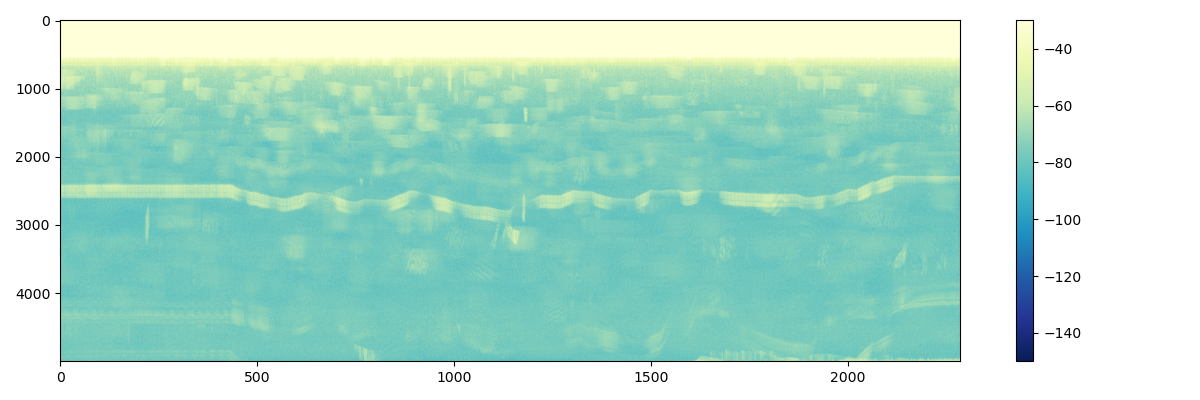

In [12]:
plt.close("echogram")
fig = plt.figure("echogram",figsize=(12,4))
ax = fig.subplots()
mapped = ax.imshow(arr.transpose(),aspect='auto',cmap='YlGnBu_r', vmin = -150, vmax=-30)
fig.colorbar(mapped)
fig.tight_layout()

/tmp/ipykernel_68071/1527342929.py:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  mapped = ax.imshow(arr1.transpose(),aspect='auto',cmap='YlGnBu_r')


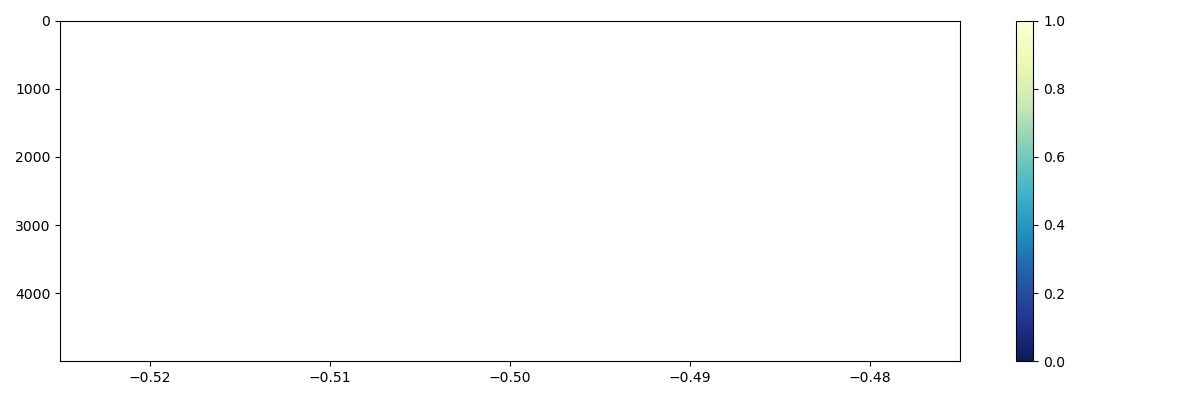

In [13]:
plt.close("angle1")
fig = plt.figure("angle1",figsize=(12,4))
ax = fig.subplots()#!/bin/xonsh

mapped = ax.imshow(arr1.transpose(),aspect='auto',cmap='YlGnBu_r')
fig.colorbar(mapped)HWChannelConfiguration
fig.tight_layout()

/tmp/ipykernel_68071/1209671337.py:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  mapped = ax.imshow(arr2.transpose(),aspect='auto',cmap='YlGnBu_r')


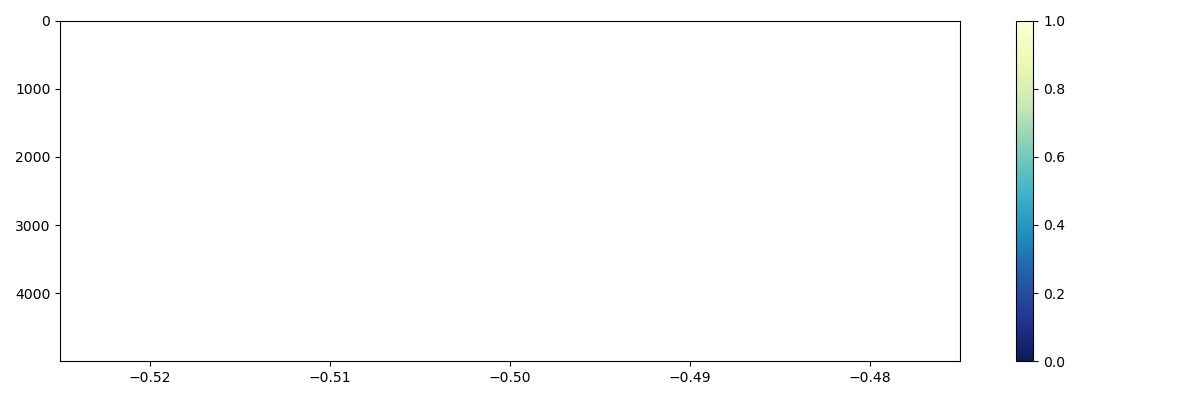

In [14]:
plt.close("angle1")
fig = plt.figure("angle1",figsize=(12,4))
ax = fig.subplots()
mapped = ax.imshow(arr2.transpose(),aspect='auto',cmap='YlGnBu_r')
fig.colorbar(mapped)
fig.tight_layout()